In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [92]:
f0 = 2400 #Гц
Vmod = 600 #Бод
Vinf = 2400 #бит/с

In [93]:
T = 1 / Vmod
m = math.ceil(Vinf / Vmod)
q = 2 ** m 
A = 800
N = 20
dt = (1/f0)/N

In [94]:
#Получение коэффициентов по номеру сигнала
def getSi12(i):
    i1 = i // np.sqrt(q)
    i2 = i % np.sqrt(q)
    si1 = A*(1 - ((2*i1)/(np.sqrt(q)-1)))
    si2 = A*(1 - ((2*i2)/(np.sqrt(q)-1)))
    return si1, si2

S = lambda si, t:   si[0] * np.sqrt(2 / T) * \
                    np.cos(2 * np.pi * f0 * t) + \
                    si[1] * np.sqrt(2 / T) * \
                    np.sin(2 * np.pi * f0 * t)

#Ортонормированные функции
phi1 = lambda t: np.sqrt(2 / T) *  np.cos(2 * np.pi * f0 * t)
phi2 = lambda t: np.sqrt(2 / T) *  np.sin(2 * np.pi * f0 * t)                    

In [95]:
t = np.arange(0, T, dt)

In [96]:
#Проверка равенства (3.1)
print('(phi1, phi1) = {}'.format(np.trapz(phi1(t) * phi1(t), dx=dt)))
print('(phi1, phi2) = {}'.format(np.trapz(phi1(t) * phi2(t), dx=dt)))
print('(phi2, phi1) = {}'.format(np.trapz(phi2(t) * phi1(t), dx=dt)))
print('(phi2, phi2) = {}'.format(np.trapz(phi2(t) * phi2(t), dx=dt)))

(phi1, phi1) = 0.9694239116136761
(phi1, phi2) = 0.006192873545644616
(phi2, phi1) = 0.006192873545644616
(phi2, phi2) = 0.997242755052991


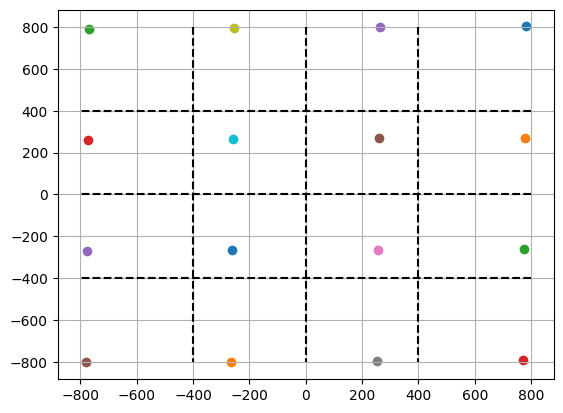

In [97]:
def signalsOutput():
    for i in range(q):
        Si12 = getSi12(i)
        Si = S(Si12, t)
        x = phi1(t)
        y = phi2(t)
        Sijx = np.trapz(Si * x, dx=dt)
        Sijy = np.trapz(Si * y, dx=dt)
        plt.scatter(Sijx, Sijy)

def signalsFieldOutput():
    size = int(np.sqrt(q))
    dx = 1 / size
    areas = np.linspace(-A - dx, A + dx, size + 1)
    for i, val in enumerate(areas):
        if i == 0 or i == size:
            continue
        plt.plot([val, val], [A + dx, -A - dx], color='black', linestyle='--')
        plt.plot([A + dx, -A - dx], [val, val], color='black', linestyle='--')

signalsOutput()
signalsFieldOutput()

plt.grid()
plt.show()

In [98]:
DbArr = list(range(1, 16)) #список отношений сигнал/шум
Perr = [] #практическая ошибка
Pe = [] #теоретическая ошибка
Nerrmax = 20

delta = 2 * A / (np.sqrt(q) - 1)
E_average = delta ** 2 * (q - 1) / 6

E0 = np.trapz(np.power(S(getSi12(0), t), 2), t, dt)

+
+
1) T(theory) = 0.8695652173913043


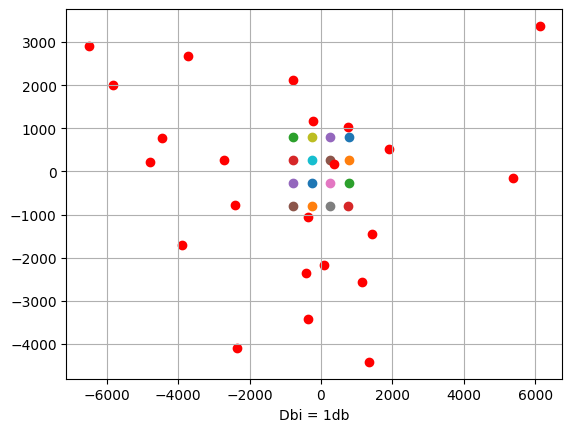

+
2) T(theory) = 0.9090909090909091


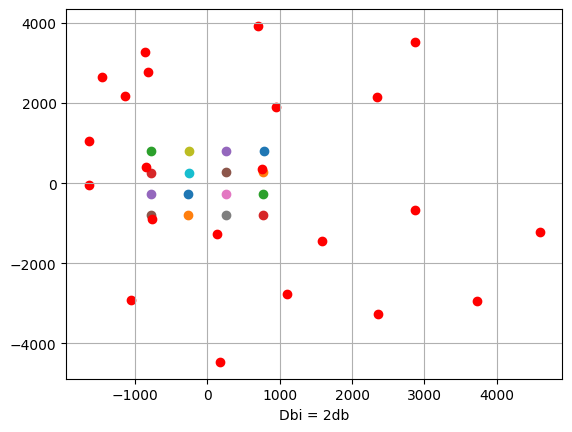

+
3) T(theory) = 0.8695652173913043


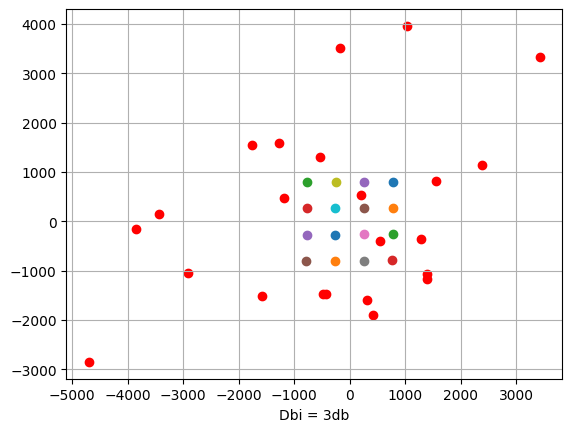

4) T(theory) = 0.7142857142857143


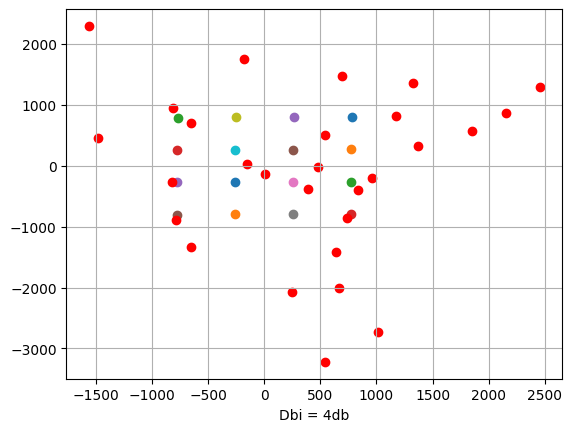

+
+
+
5) T(theory) = 0.8333333333333334


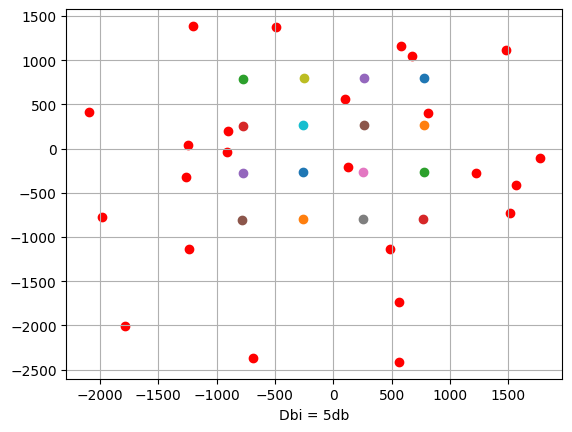

+
+
6) T(theory) = 0.8333333333333334


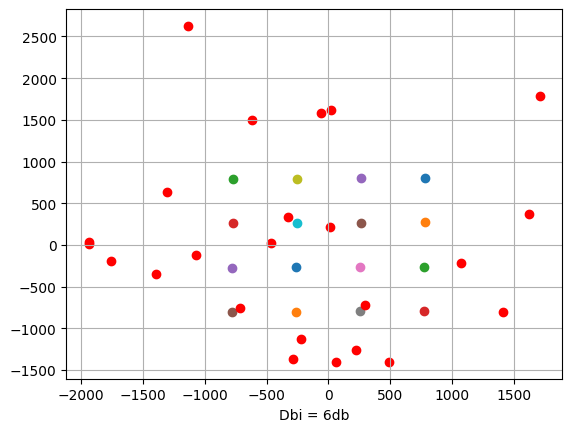

+
7) T(theory) = 0.7692307692307693


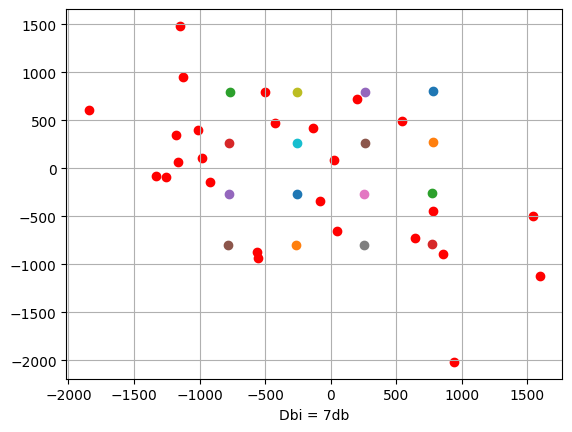

+
+
8) T(theory) = 0.7407407407407407


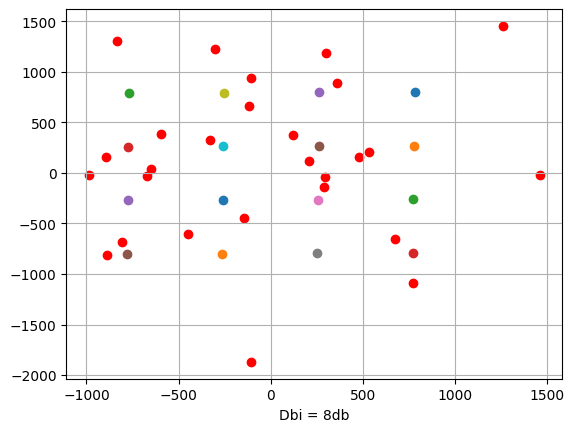

+
+
9) T(theory) = 0.5882352941176471


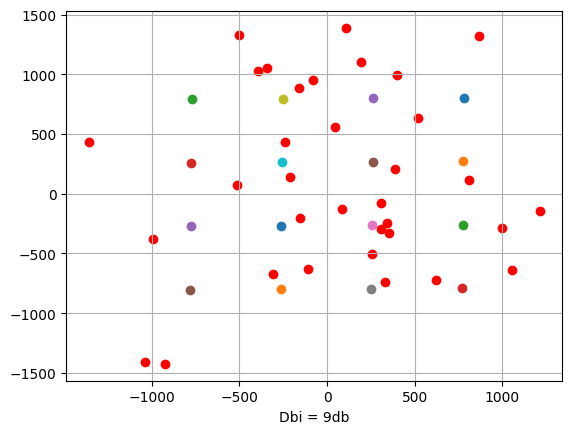

+
+
10) T(theory) = 0.6451612903225806


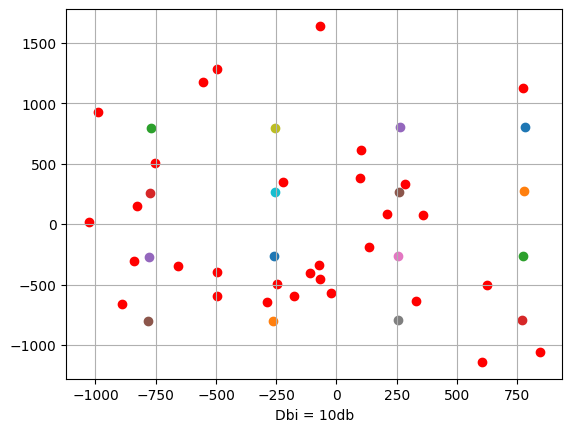

+
+
+
+
+
+
+
+
11) T(theory) = 0.39215686274509803


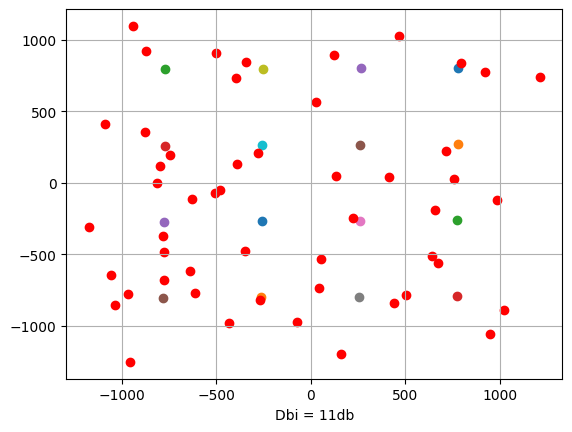

+
+
+
+
12) T(theory) = 0.31746031746031744


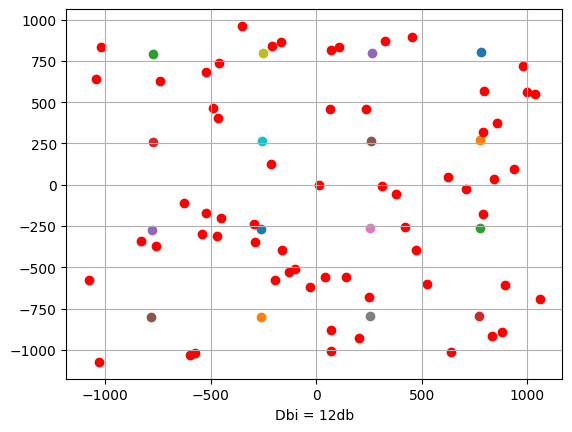

+
+
+
13) T(theory) = 0.17857142857142858


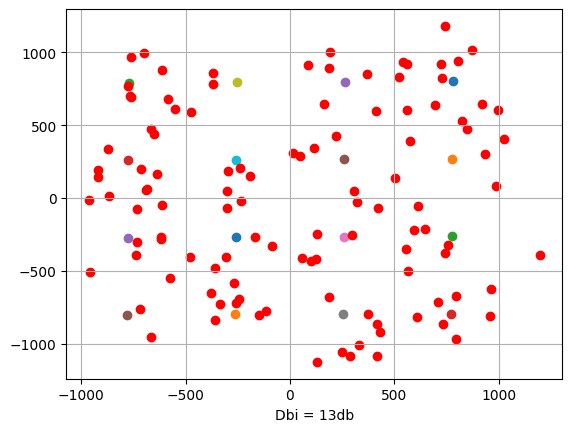

+
+
+
+
+
+
+
+
+
+
+
+
14) T(theory) = 0.08928571428571429


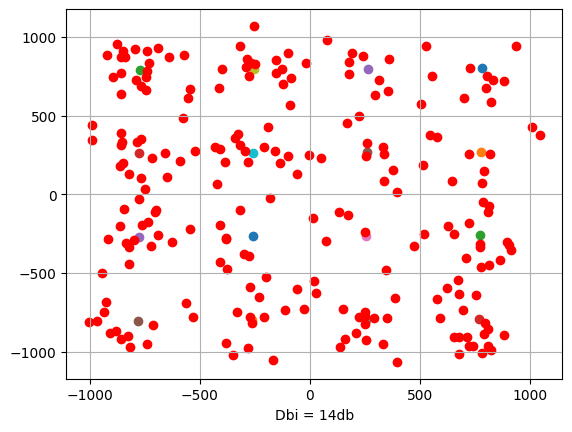

+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
15) T(theory) = 0.012746972594008922


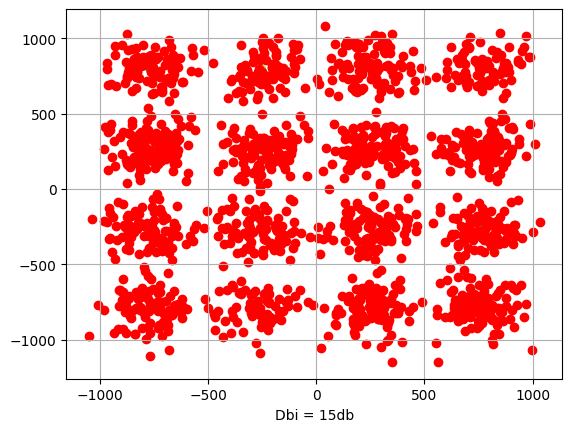

In [99]:
for Dbi in DbArr:
    Db = np.power(10, Dbi / 10)
    Nerr = 0 #количество событий ^i != i
    Ntest = 0 #количество событий ^i == i

    signalsOutput()
 
    while Nerr < Nerrmax:
        ts = np.random.randint(0, q) #сигнал
        # ts = 15
        N0 = E0 / Db
        N = np.random.normal(0, N0 / 2, size=len(t))
        r = S(getSi12(ts), t) + N #сигнал на выходе канала

        xf = phi1(t) #координаты базиса
        yf = phi2(t)

        xr = np.trapz(r * xf, t, dt) #координаты реального сигнала
        yr = np.trapz(r * yf, t, dt)

        S0 = S(getSi12(0), t) #первый сигнал
        S0x = np.trapz(S0 * xf, t, dt) #координаты первого сигнала
        S0y = np.trapz(S0 * yf, t, dt)

        Ipred = np.power(S0x - xr, 2) + np.power(S0y - yr, 2) #предполагаемый путь от первого сигнала к реальному
        index = 0 #предполагаемый индекс сигнала
        for i in range(q):
            Si = S(getSi12(i), t)
            Six = np.trapz(Si * xf, t, dt)
            Siy = np.trapz(Si * yf, t, dt)
            Ipath = np.power(Six - xr, 2) + np.power(Siy - yr, 2)  #путь от i-сигнала к реальному
            if Ipath < Ipred: #находим наименьший путь
                Ipred = Ipath
                index = i
        if index != ts: #увеличиваем счетчик ошибок, если сигнал определен неправильно
            Nerr += 1

        plt.scatter(xr, yr, color='red') #текущий реальный сигнал

        Ntest += 1

    print('{}) T(theory) = {}'.format(Dbi, Nerr / Ntest))
    Perr.append(Nerrmax / Ntest)
    Pe.append(np.exp(-(3*E_average)/((2*(q-1)*N0))))
    
    plt.grid()
    plt.xlabel('Dbi = {}db'.format(Dbi))
    plt.show()

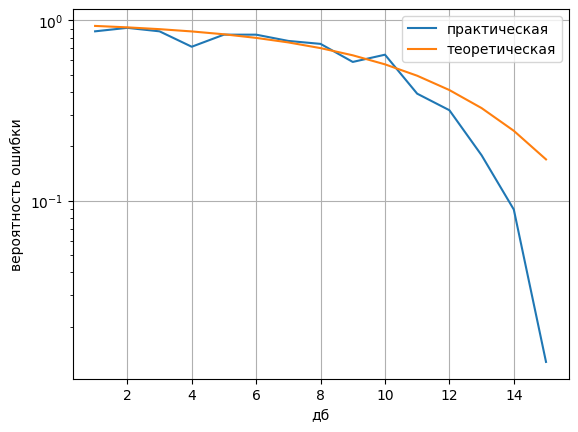

In [100]:
plt.plot(DbArr, Perr, label = 'практическая')
plt.plot(DbArr, Pe, label = 'теоретическая')
plt.yscale('log')
plt.xlabel('дб')
plt.ylabel('вероятность ошибки')
plt.legend()
plt.grid()
plt.show()